# The Titanic movie dataset analysis

In [1]:
# Loading Dataset
import pandas as pd  # Library for handling data
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for visualization
import seaborn as sns  # Advanced visualization library

# Load dataset
df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')  # Load dataset into a DataFrame
df.head()  # Display first five rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Basic information
df.info()  # Summary of dataset (column names, data types, non-null values)
df.describe()  # Summary statistics (mean, std, min, max, etc.)
df.isnull().sum()  # Count missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

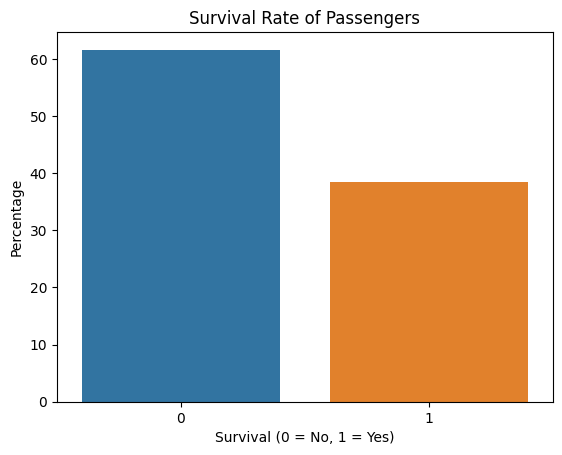

In [3]:
# survival rate analysis
survival_rate = df['Survived'].value_counts(normalize=True) * 100  # Calculate survival percentage
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate of Passengers")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.show()


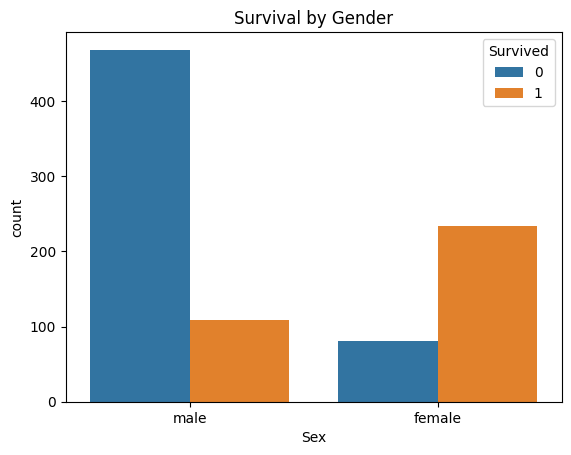

In [4]:
#Gender vs. Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


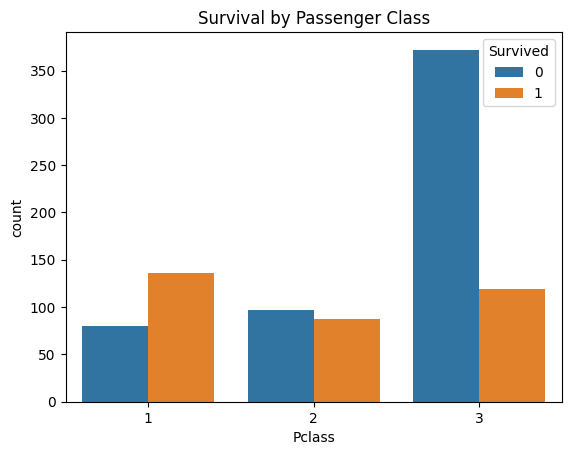

In [5]:
#Passenger Class vs. Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


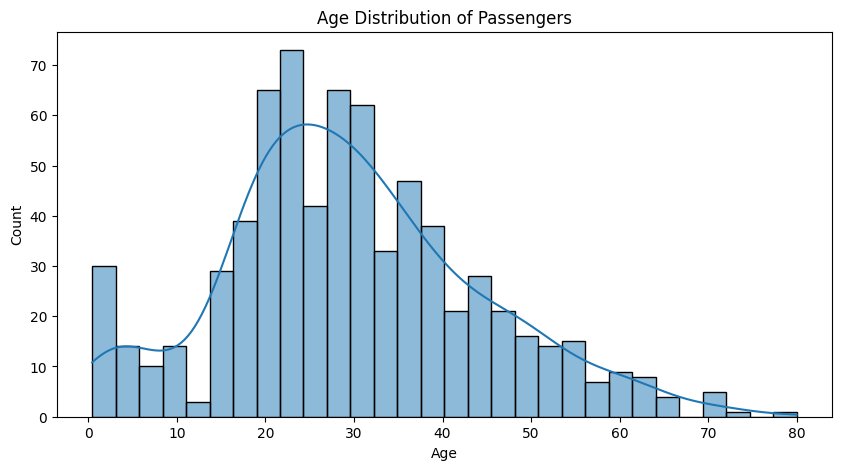

In [6]:
#Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()


In [7]:
#Missing Data Handling
df['Age'].fillna(df['Age'].median(), inplace=True)  # Replace missing ages with median age
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Replace missing embarkation with most common value


<ipython-input-7-61b536d582a0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Replace missing ages with median age
<ipython-input-7-61b536d582a0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

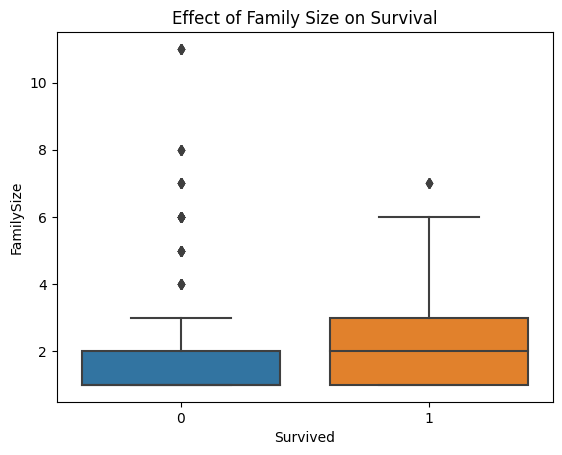

In [8]:
#Family Size vs. Survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Create a new column for total family size
sns.boxplot(x='Survived', y='FamilySize', data=df)
plt.title("Effect of Family Size on Survival")
plt.show()


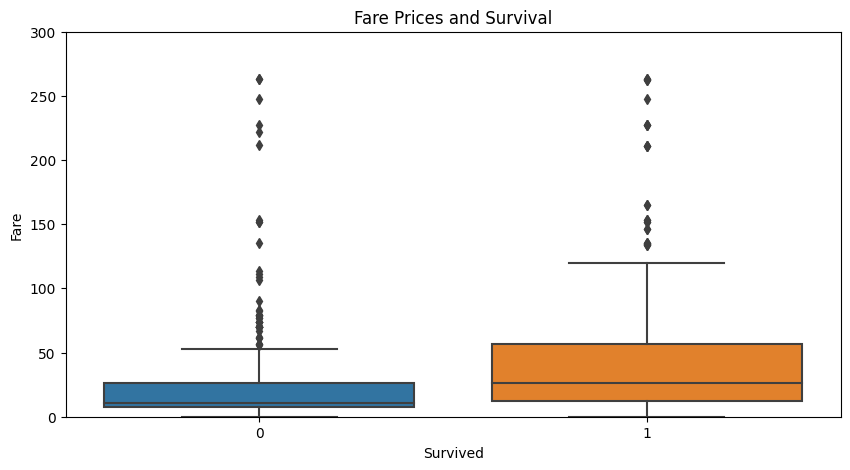

In [9]:
#Fare vs. Survival
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.ylim(0, 300)  # Set y-axis limit for better visualization
plt.title("Fare Prices and Survival")
plt.show()


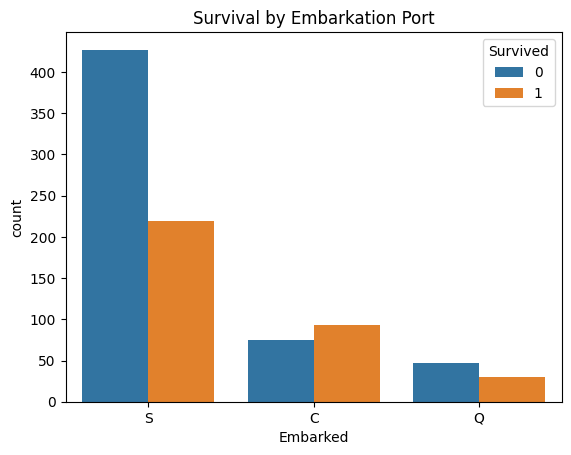

In [10]:
# Embarkation Port Analysis
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")
plt.show()
